## IMPORTS

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import os
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
from sklearn import metrics 

import warnings
warnings.filterwarnings('ignore')

In [23]:
from sklearn.preprocessing import StandardScaler,RobustScaler
sc = StandardScaler()
rb = RobustScaler()

## READING DATA

In [43]:
train = pd.read_csv('train.csv')
test = pd.read_csv("test.csv")

#targets = tf.keras.utils.to_categorical(train['Class'], num_classes=11, dtype='float32')
targets = train['Class']

In [44]:
train

,Id,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,1,Marina Maximilian,Not Afraid,37.0,0.334,0.536,9.0,-6.649,0,0.0381,0.378000,NaN,0.1060,0.235,152.429,204947.000000,4,9
1,2,The Black Keys,Howlin' for You,67.0,0.725,0.747,11.0,-5.545,1,0.0876,0.027200,0.046800,0.1040,0.380,132.921,191956.000000,4,6
2,3,Royal & the Serpent,phuck u,NaN,0.584,0.804,7.0,-6.094,1,0.0619,0.000968,0.635000,0.2840,0.635,159.953,161037.000000,4,10
3,4,Detroit Blues Band,Missing You,12.0,0.515,0.308,NaN,-14.711,1,0.0312,0.907000,0.021300,0.3000,0.501,172.472,298093.000000,3,2
4,5,Coast Contra,My Lady,48.0,0.565,0.777,6.0,-5.096,0,0.2490,0.183000,NaN,0.2110,0.619,88.311,254145.000000,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14391,14392,NOISY,I Wish I Was A...,47.0,0.607,0.946,1.0,-2.965,1,0.1500,0.005480,0.000390,0.2780,0.653,120.011,195181.000000,4,10
14392,14393,BLOODSPOT,Deadline Story (feat. Patrick Boos),27.0,0.435,0.951,8.0,-7.475,1,0.0576,0.000005,0.550000,0.0952,0.203,135.034,282043.000000,4,8
14393,14394,Cold Years,Too Far Gone,22.0,0.415,0.941,11.0,-4.300,1,0.0524,0.001810,0.000004,0.3370,0.572,167.978,176529.000000,4,10
14394,14395,The Jaded Hearts Club,Reach Out I'll Be There,37.0,0.493,0.986,1.0,-2.279,1,0.0917,0.000967,0.006620,0.1230,0.567,122.036,186307.000000,4,10


In [25]:
music_genres = {
    1: "Blues",
    2: "Classical",
    3: "Country",
    4: "Disco",
    5: "Hip-hop",
    6: "Jazz",
    7: "Metal",
    8: "Pop",
    9: "Reggae",
    10: "Rock"
}

In [26]:
train['Class'] = train['Class'].map(music_genres)

In [27]:
train.isna().sum()

Id                       0
Artist Name              0
Track Name               0
Popularity             333
danceability             0
energy                   0
key                   1609
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      3541
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                  500
dtype: int64

## DATA VISUALIZATION

In [28]:
train['Class'].value_counts()

Class
Rock         3959
Jazz         2069
Reggae       2019
Pop          1483
Hip-hop      1157
Blues        1098
Classical    1018
Metal         461
Country       322
Disco         310
Name: count, dtype: int64

In [29]:
train.describe()

,Id,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
count,14396.000000,14063.000000,14396.000000,14396.000000,12787.000000,14396.000000,14396.000000,14396.000000,14396.000000,10855.000000,14396.000000,14396.000000,14396.000000,1.439600e+04,14396.000000
mean,7198.500000,44.525208,0.543105,0.662422,5.953781,-7.900852,0.640247,0.080181,0.246746,0.178129,0.195782,0.486379,122.695372,2.000942e+05,3.924354
std,4155.911573,17.418940,0.165517,0.235967,3.200013,4.057362,0.479944,0.085157,0.310922,0.304266,0.159258,0.239476,29.538490,1.116891e+05,0.359520
min,1.000000,1.000000,0.059600,0.001210,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.021500,30.557000,5.016500e-01,1.000000
25%,3599.750000,33.000000,0.432000,0.508000,3.000000,-9.538000,0.000000,0.034800,0.004280,0.000088,0.097275,0.299000,99.799000,1.654458e+05,4.000000
50%,7198.500000,44.000000,0.545000,0.699000,6.000000,-7.013500,1.000000,0.047100,0.081450,0.003920,0.129000,0.480500,120.060000,2.089410e+05,4.000000
75%,10797.250000,56.000000,0.658000,0.861000,9.000000,-5.162000,1.000000,0.083100,0.432250,0.201000,0.256000,0.672000,141.988250,2.522470e+05,4.000000
max,14396.000000,100.000000,0.989000,1.000000,11.000000,1.342000,1.000000,0.955000,0.996000,0.996000,0.992000,0.986000,217.416000,1.477187e+06,5.000000


In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14396 entries, 0 to 14395
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  14396 non-null  int64  
 1   Artist Name         14396 non-null  object 
 2   Track Name          14396 non-null  object 
 3   Popularity          14063 non-null  float64
 4   danceability        14396 non-null  float64
 5   energy              14396 non-null  float64
 6   key                 12787 non-null  float64
 7   loudness            14396 non-null  float64
 8   mode                14396 non-null  int64  
 9   speechiness         14396 non-null  float64
 10  acousticness        14396 non-null  float64
 11  instrumentalness    10855 non-null  float64
 12  liveness            14396 non-null  float64
 13  valence             14396 non-null  float64
 14  tempo               14396 non-null  float64
 15  duration_in min/ms  14396 non-null  float64
 16  time

In [31]:
test.describe()

,Id,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
count,3600.000000,3505.000000,3600.000000,3600.000000,3195.000000,3600.000000,3600.000000,3600.000000,3600.000000,2764.000000,3600.000000,3600.000000,3600.000000,3.600000e+03,3600.000000
mean,16196.500000,44.459629,0.544744,0.664197,5.947105,-7.949879,0.622778,0.077813,0.248425,0.175336,0.197720,0.485527,122.335063,2.033447e+05,3.922778
std,1039.374812,17.461328,0.169257,0.233010,3.184676,4.016468,0.484759,0.076914,0.309510,0.303238,0.159040,0.243082,29.705640,1.131593e+05,0.369936
min,14397.000000,1.000000,0.064600,0.000020,1.000000,-34.797000,0.000000,0.022700,0.000001,0.000001,0.014400,0.018300,48.718000,9.871167e-01,1.000000
25%,15296.750000,33.000000,0.430000,0.512000,3.000000,-9.532500,0.000000,0.034800,0.004488,0.000093,0.098575,0.291000,98.515750,1.688360e+05,4.000000
50%,16196.500000,44.000000,0.549000,0.703000,6.000000,-7.043500,1.000000,0.048750,0.080850,0.003755,0.131000,0.481000,120.091000,2.103355e+05,4.000000
75%,17096.250000,56.000000,0.664000,0.859000,9.000000,-5.282250,1.000000,0.082800,0.441250,0.197250,0.265250,0.674000,141.846750,2.533958e+05,4.000000
max,17996.000000,97.000000,0.970000,0.999000,11.000000,1.355000,1.000000,0.886000,0.996000,0.973000,1.000000,0.984000,214.396000,1.412451e+06,5.000000


In [32]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600 entries, 0 to 3599
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  3600 non-null   int64  
 1   Artist Name         3600 non-null   object 
 2   Track Name          3600 non-null   object 
 3   Popularity          3505 non-null   float64
 4   danceability        3600 non-null   float64
 5   energy              3600 non-null   float64
 6   key                 3195 non-null   float64
 7   loudness            3600 non-null   float64
 8   mode                3600 non-null   int64  
 9   speechiness         3600 non-null   float64
 10  acousticness        3600 non-null   float64
 11  instrumentalness    2764 non-null   float64
 12  liveness            3600 non-null   float64
 13  valence             3600 non-null   float64
 14  tempo               3600 non-null   float64
 15  duration_in min/ms  3600 non-null   float64
 16  time_s

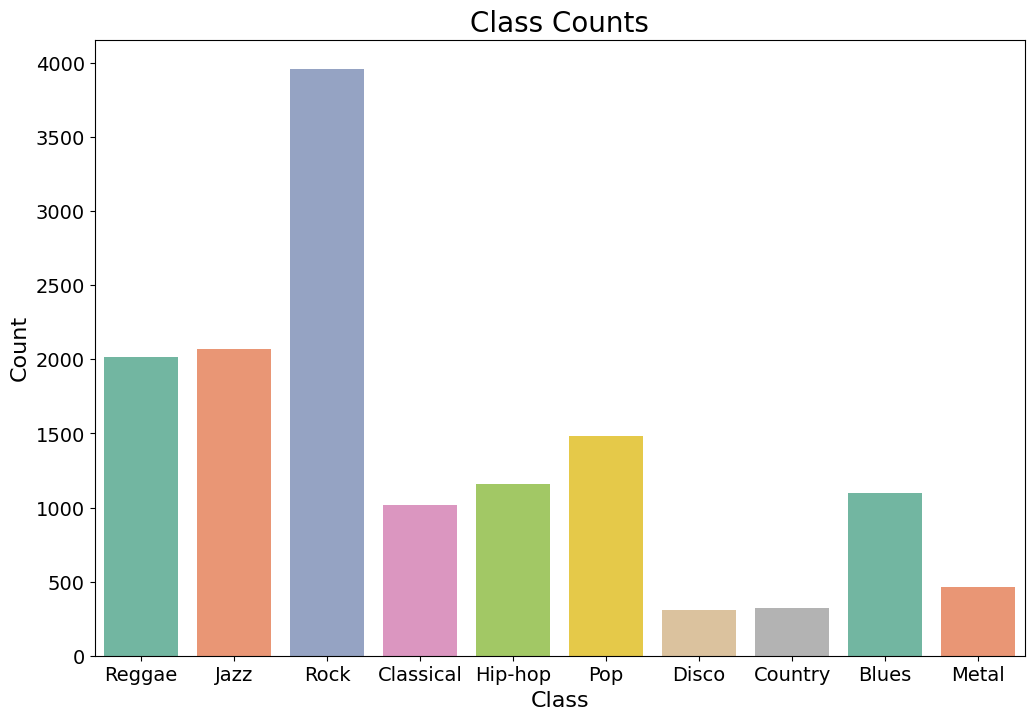

In [33]:
# plot the counts of each genre and make all the bars in the graph different colors
plt.figure(figsize=(12,8))
sns.countplot(x='Class', data=train, palette='Set2')
plt.title('Class Counts', fontsize=20)
plt.xlabel('Class', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()


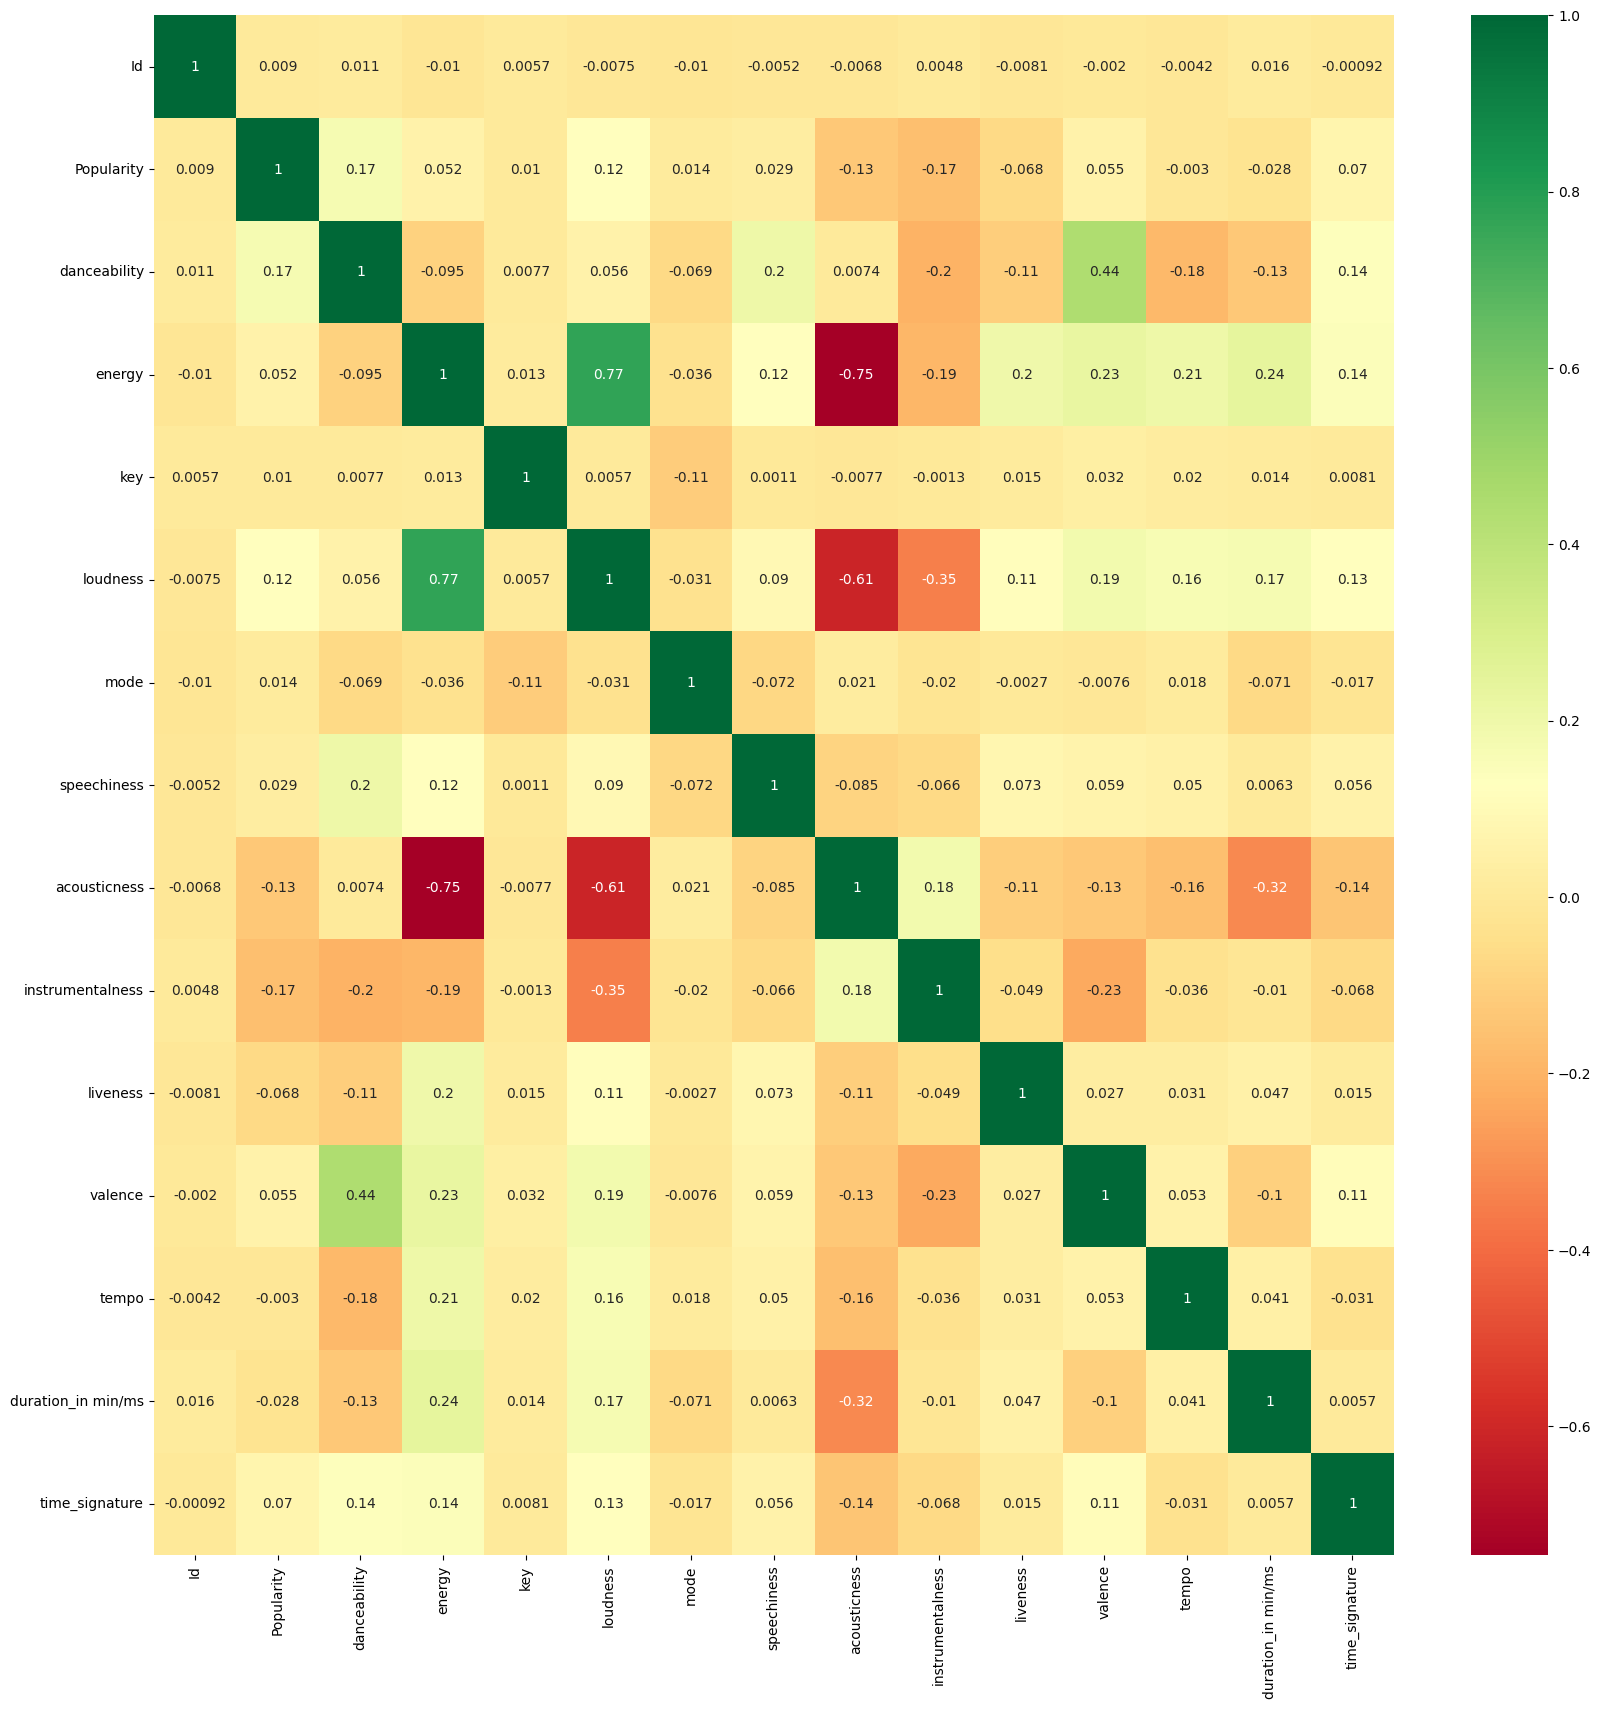

In [34]:
#drop the target variable and artist ,id , track name ,release date columns
temp = train.drop(['Class','Artist Name','Track Name'],axis=1)

corr = temp.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap="RdYlGn")
plt.show()



In [35]:
train.drop(['Id','Artist Name','Track Name'], axis=1, inplace=True)
test.drop(['Id','Artist Name','Track Name'], axis=1, inplace=True)

def clean_data(df):
    df['Popularity'].fillna(float(df['Popularity'].mean()), inplace=True)
    df['key'].fillna(int(df['key'].mean()), inplace=True)
    df['instrumentalness'].fillna(float(df['instrumentalness'].mean()), inplace=True)
    return df

In [36]:
train = clean_data(train)
test = clean_data(test)

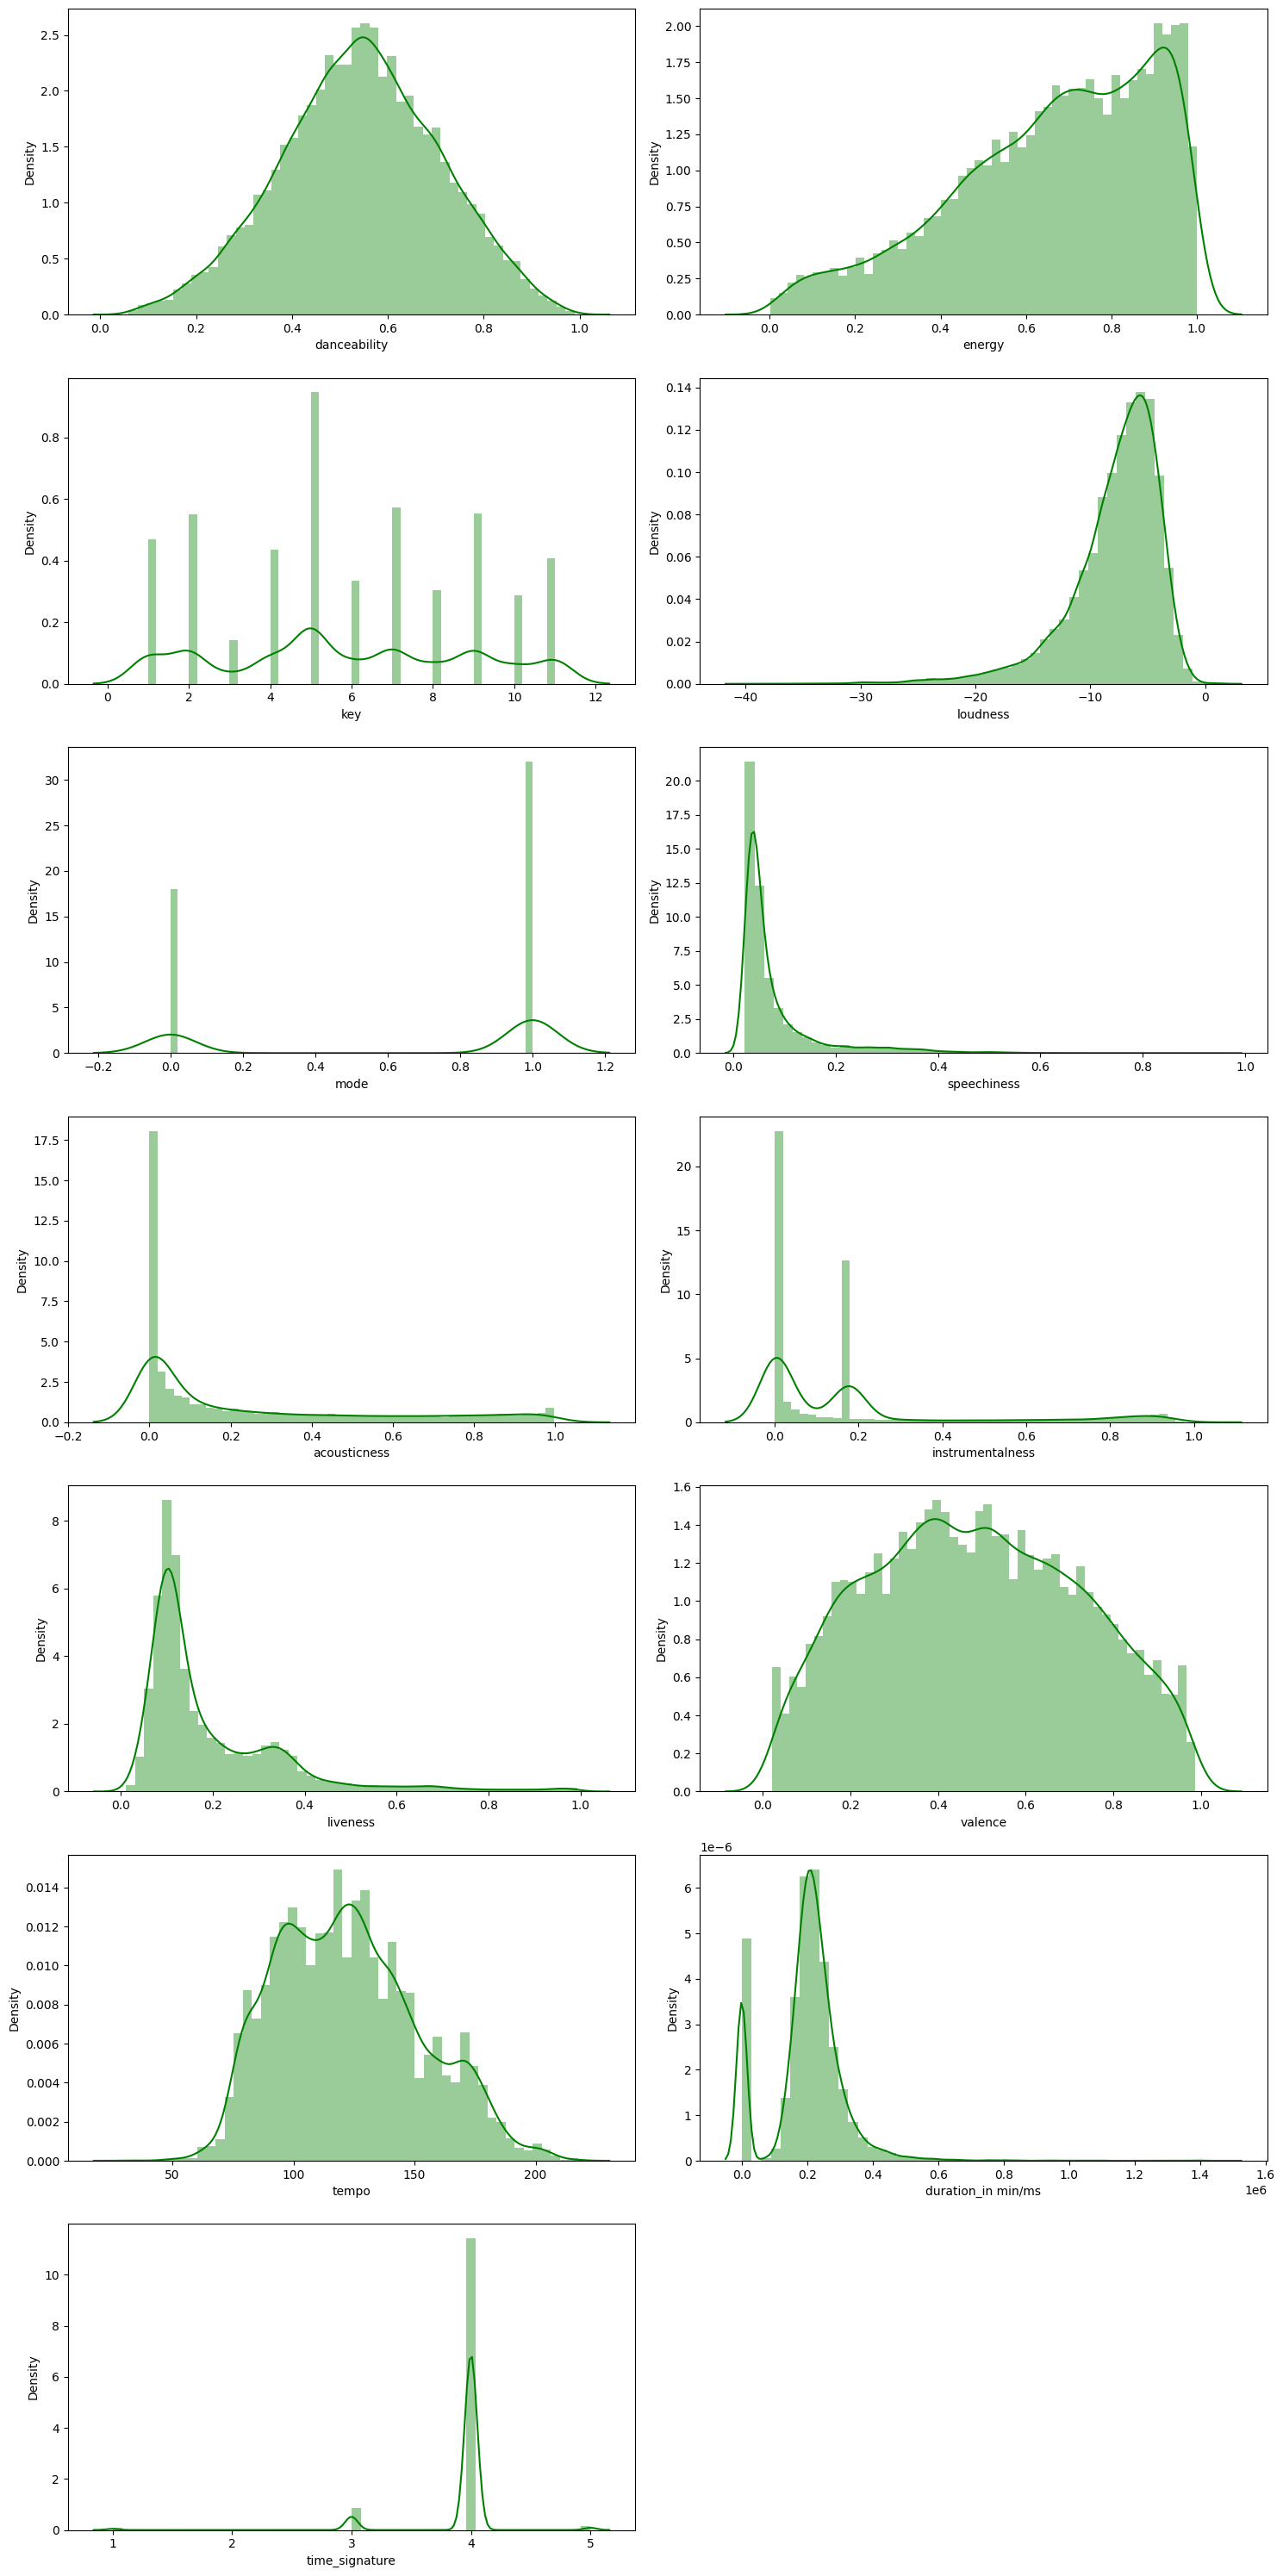

In [37]:
# I want to see the distribution of the features
fig = plt.figure(figsize=(15, 30))
for i in range(1, 14):
    fig.add_subplot(7, 2, i)
    sns.distplot(train.iloc[:, i], color='green', bins=50)
plt.tight_layout()
plt.show()


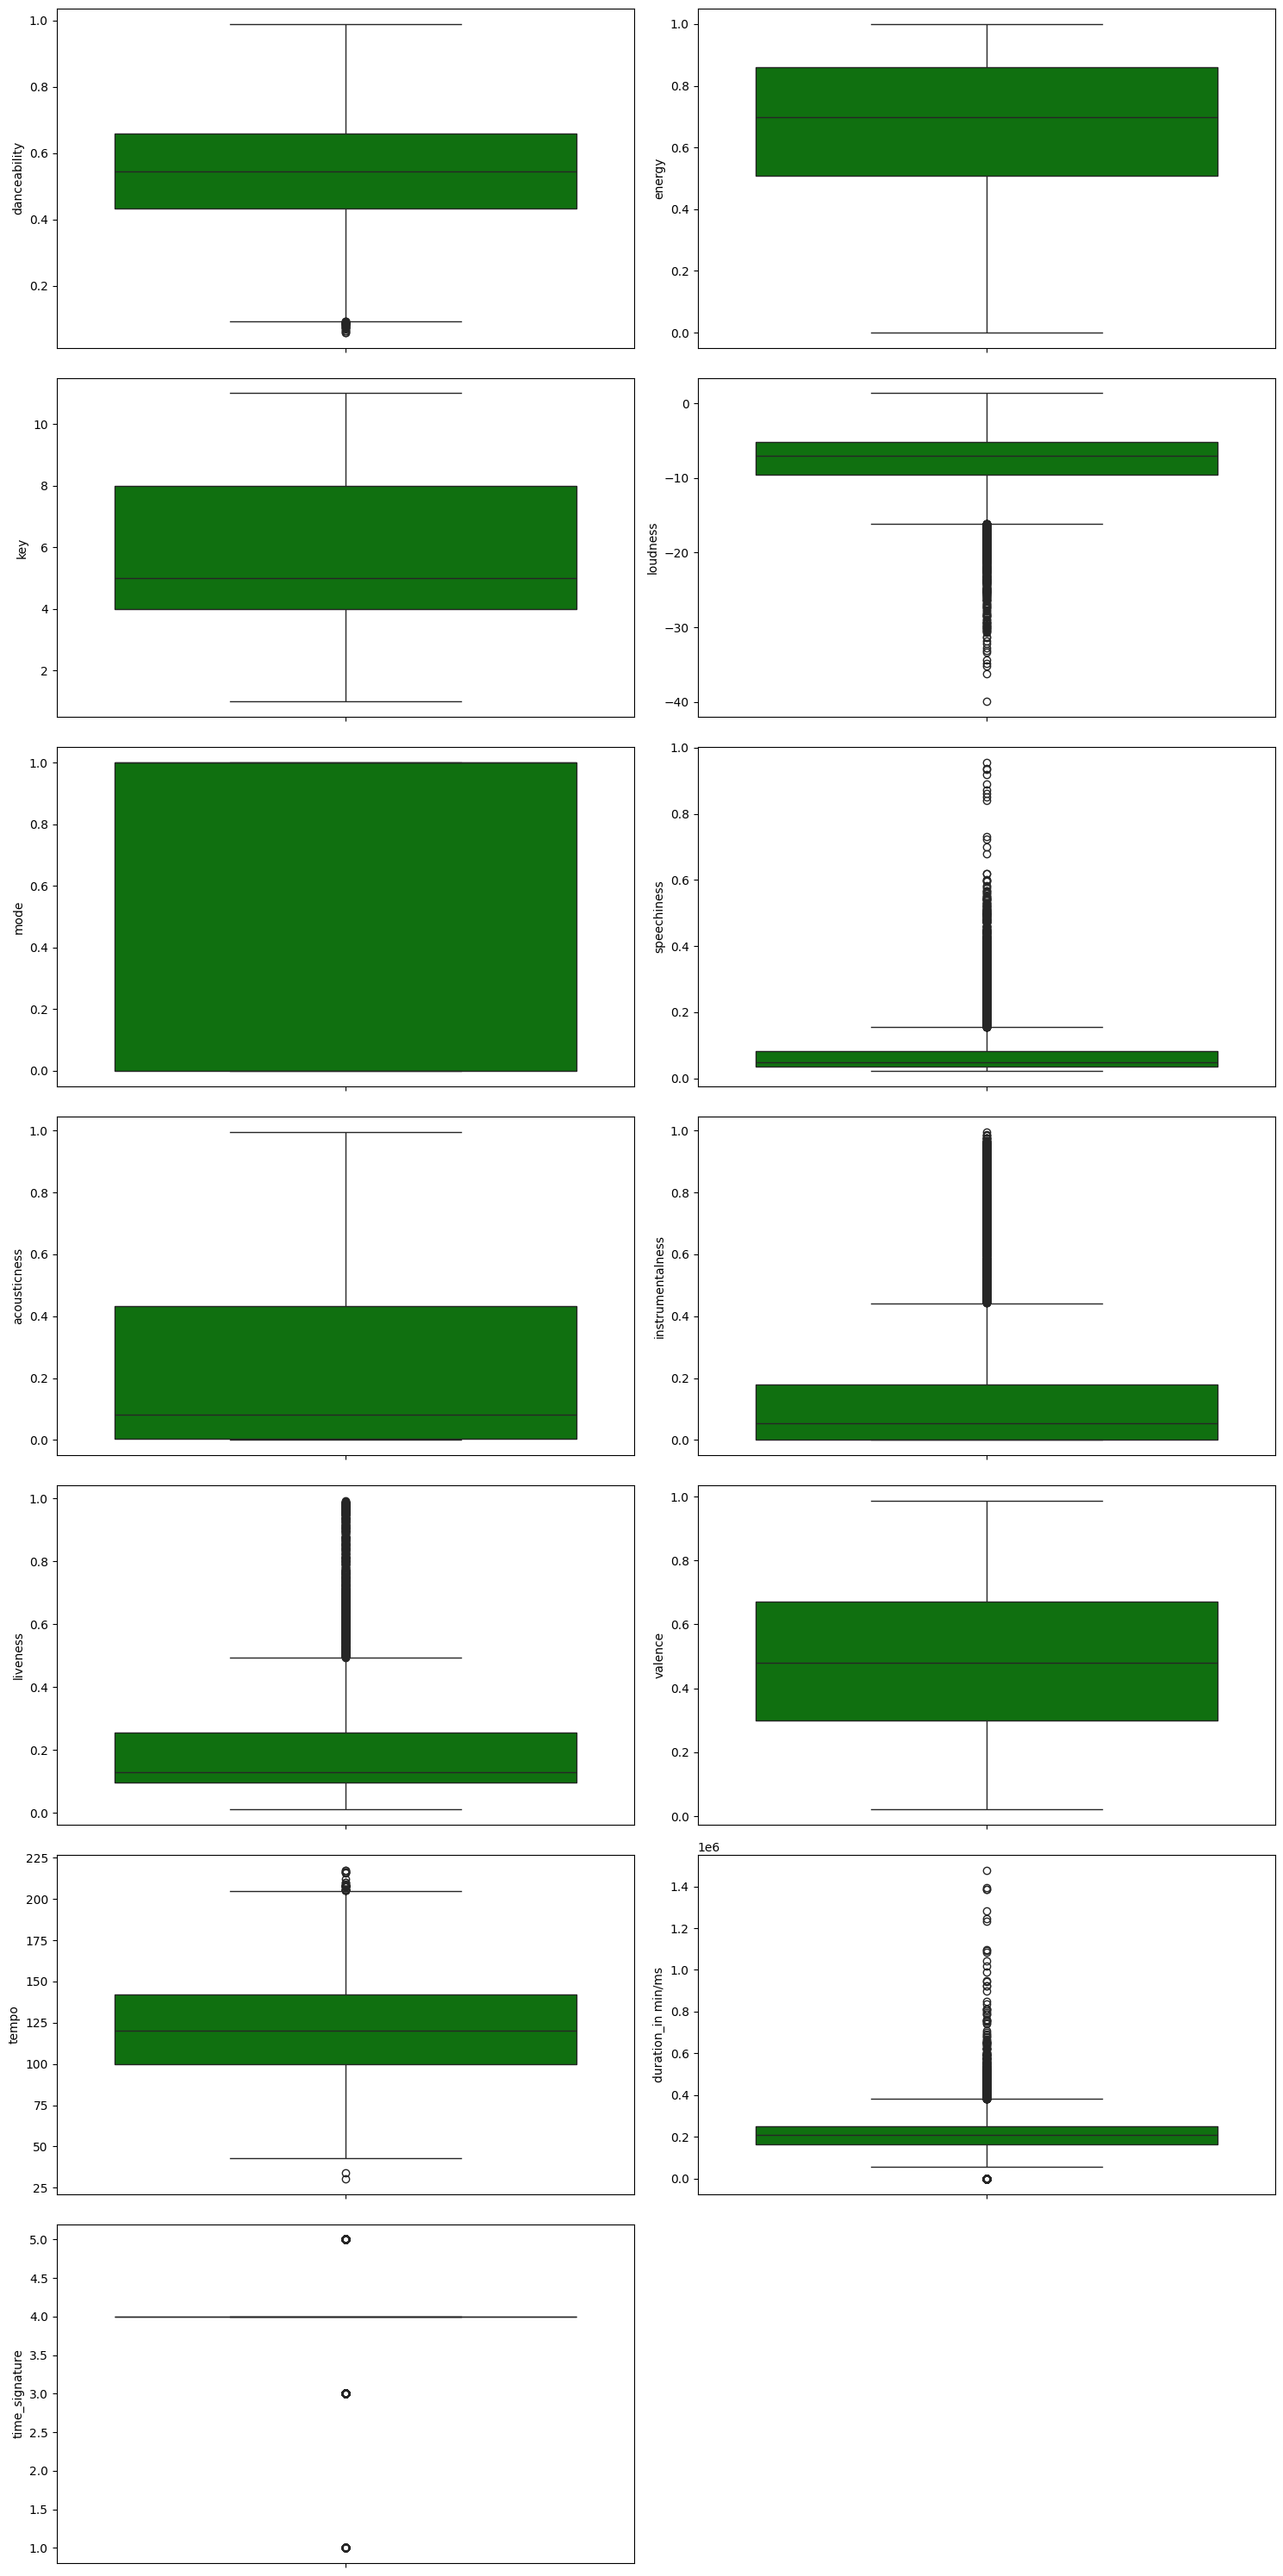

In [38]:
# some other plots
fig = plt.figure(figsize=(15, 30))
for i in range(1, 14):
    fig.add_subplot(7, 2, i)
    sns.boxplot(y=train.iloc[:, i], color='green')
plt.tight_layout()
plt.show()


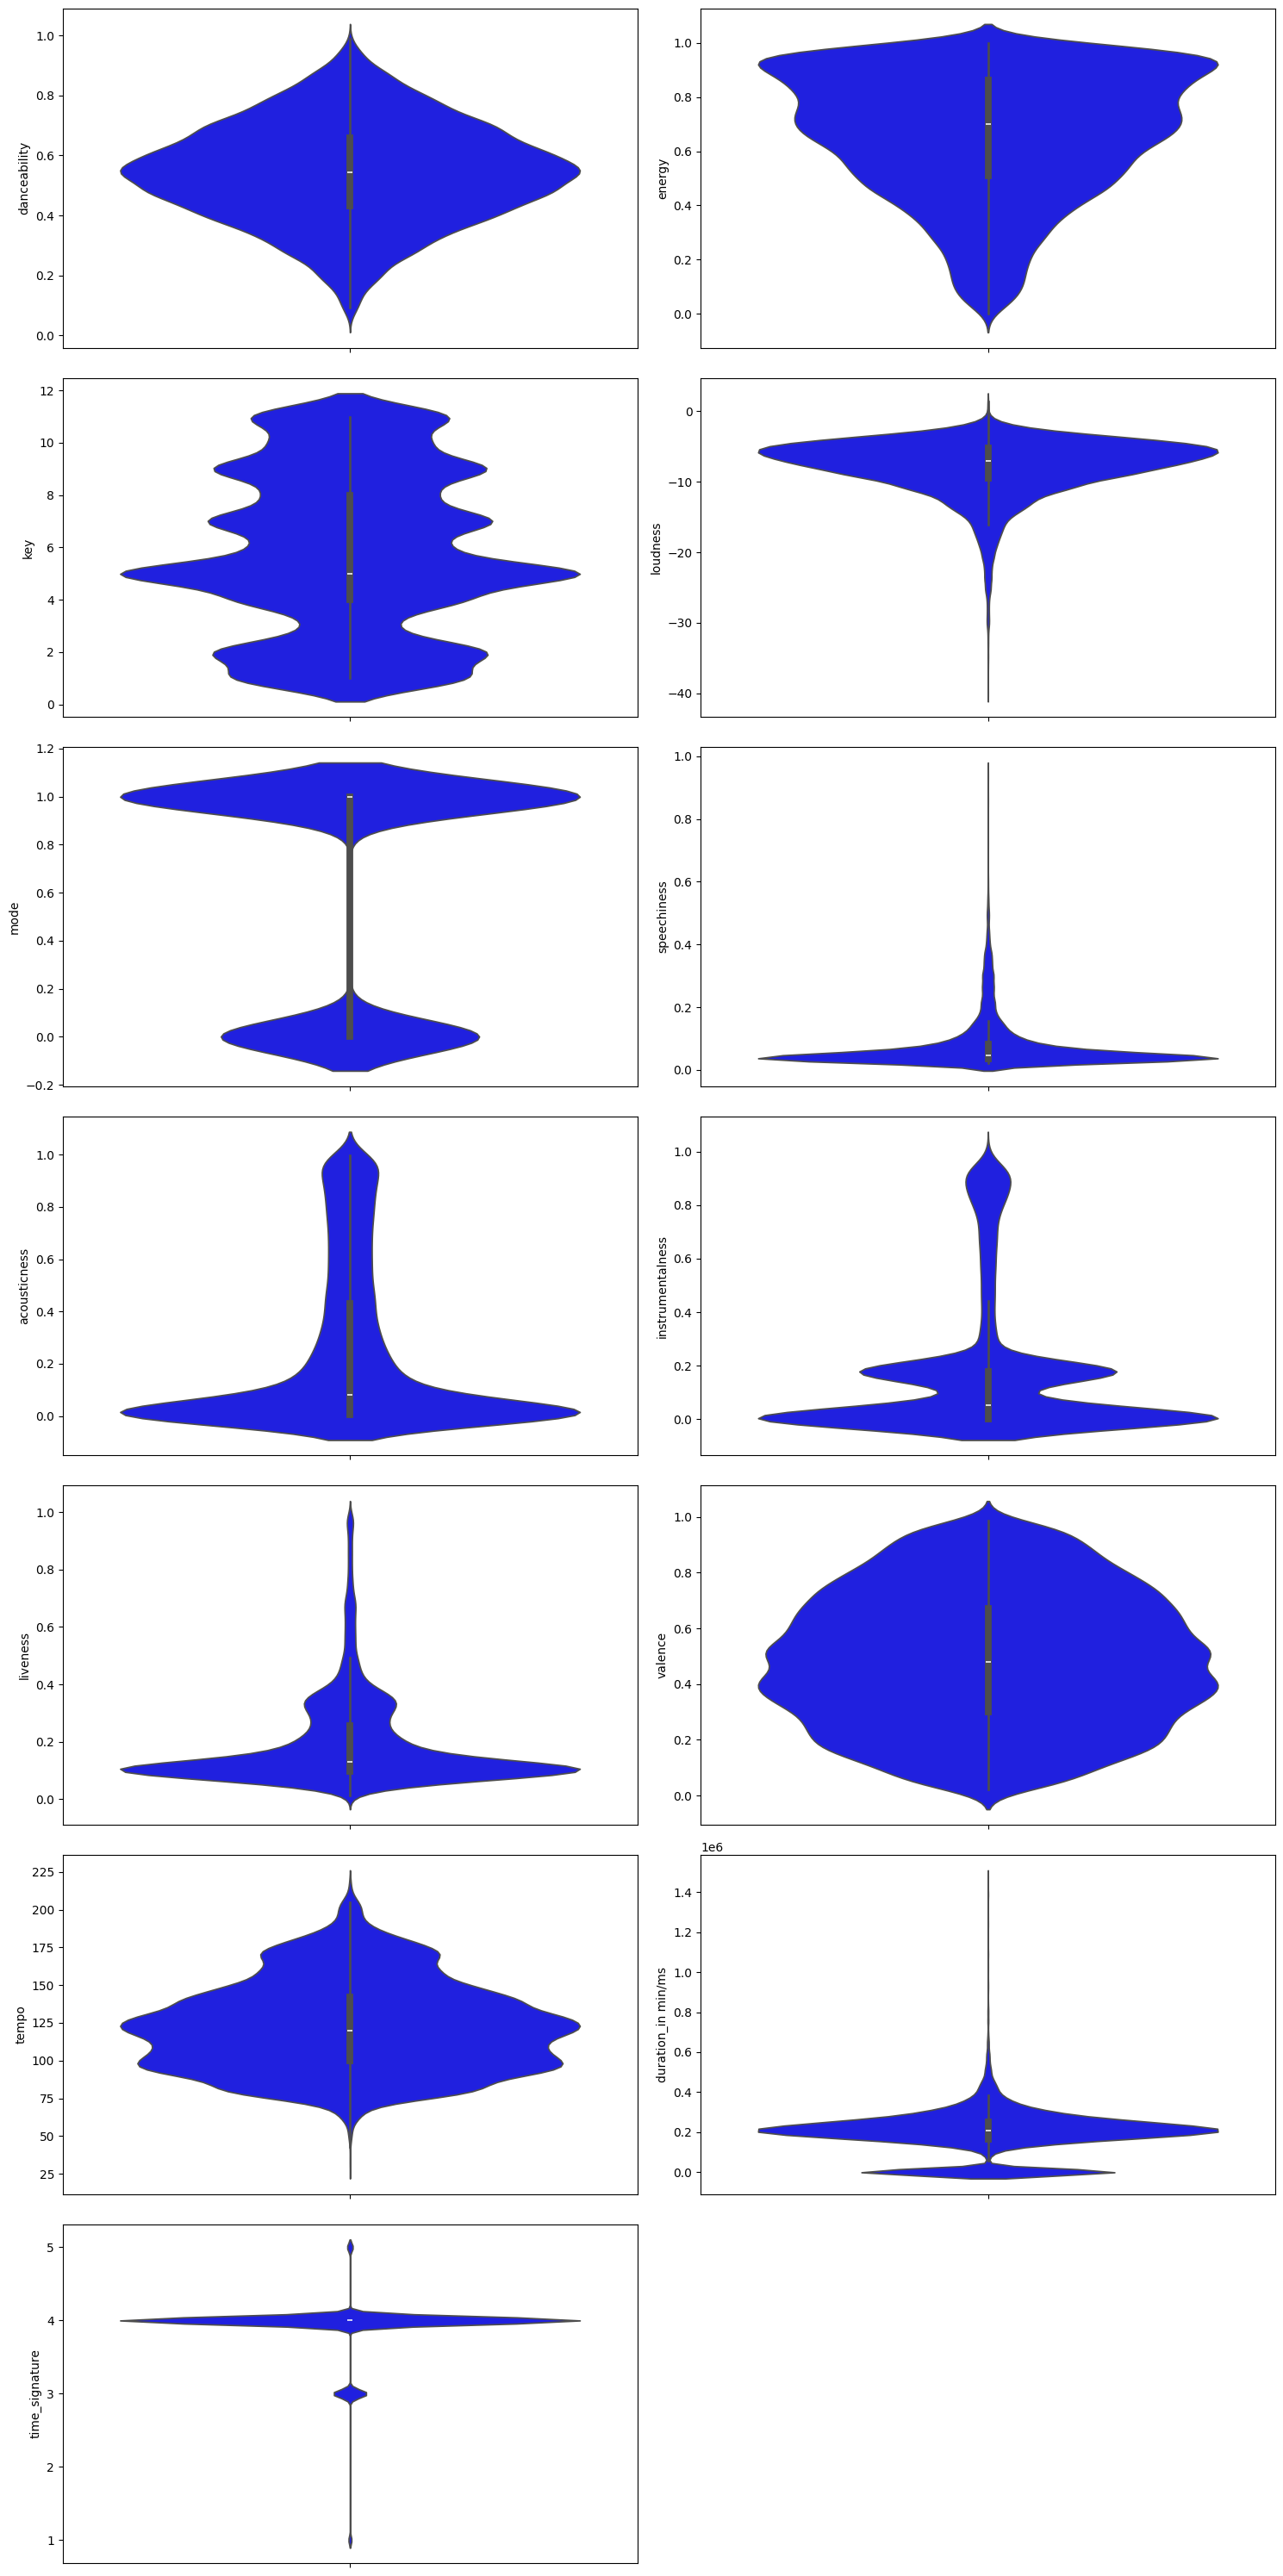

In [39]:
#give me some more insightful visualizations
fig = plt.figure(figsize=(15, 30))
for i in range(1, 14):
    fig.add_subplot(7, 2, i)
    sns.violinplot(y=train.iloc[:, i], color='blue')
plt.tight_layout()
plt.show()


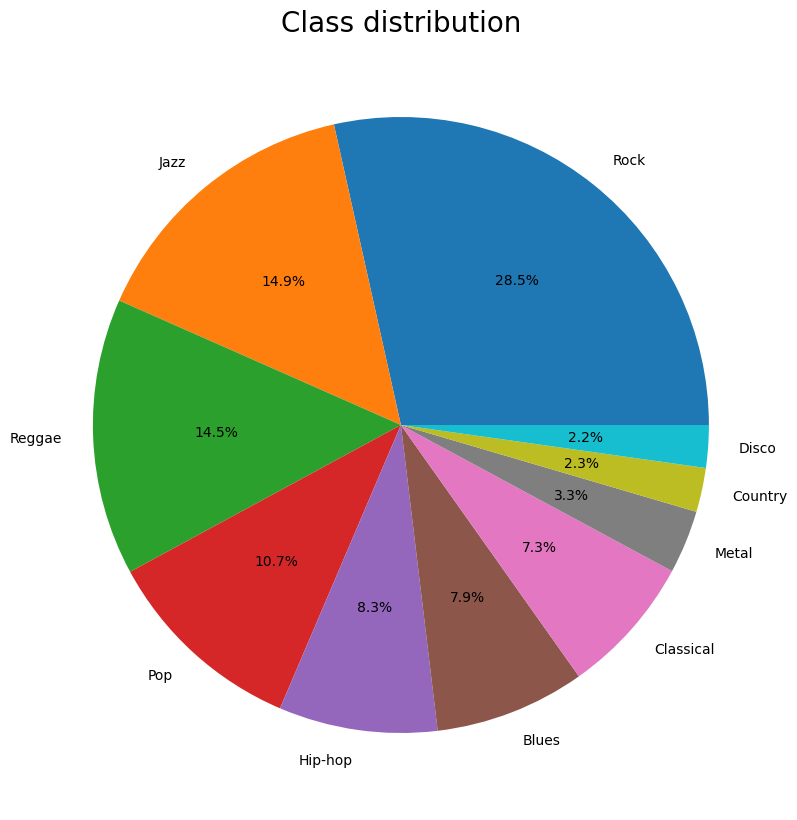

In [40]:
#I want a 3d pie chart to see the distribution of the target variable
plt.figure(figsize=(10, 10))
plt.pie(train['Class'].value_counts(), labels=train['Class'].value_counts().index, autopct='%1.1f%%')
plt.title('Class distribution', fontsize=20)
plt.show()

In [41]:
train.isna().sum()

Popularity              0
danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
duration_in min/ms      0
time_signature          0
Class                 500
dtype: int64

## DATA SCALING

In [42]:
train.drop(['Id','Artist Name','Track Name'], axis=1, inplace=True)
test.drop(['Id','Artist Name','Track Name'], axis=1, inplace=True)

def clean_data(df):
    df['Popularity'].fillna(float(df['Popularity'].mean()), inplace=True)
    df['key'].fillna(int(df['key'].mean()), inplace=True)
    df['instrumentalness'].fillna(float(df['instrumentalness'].mean()), inplace=True)
    return df

KeyError: "['Id', 'Artist Name', 'Track Name'] not found in axis"

In [ ]:
train = clean_data(train)
test = clean_data(test)

In [ ]:
rb.fit(train)
train = rb.transform(train)
test = rb.transform(test)

ValueError: could not convert string to float: 'Marina Maximilian'